# <span style = "color: green"> Income Evaluation </span>

***

The dataset is credited to Ronny Kohavi and Barry Becker and was drawn from the 1994 United States Census Bureau data and involves using personal details such as education level to predict whether an individual will earn more or less than $50,000 per year.

The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

### <span style = "color: blue"> Content </span>

The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:

* Age.
* Workclass.
* Final Weight.
* Education.
* Education Number of Years.
* Marital-status.
* Occupation.
* Relationship.
* Race.
* Sex.
* Capital-gain.
* Capital-loss.
* Hours-per-week.
* Native-country.

## Let's Begin

### Import necessary libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read "income_evaluation.csv" dataset and Store it in a DataFrame

In [62]:
df = pd.read_csv("income_evaluation.csv")

### View top 5 rows

In [63]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### View info of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Check for any null values

In [11]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

### View the basic statistical information about the dataset

In [12]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Check unique values in income

In [64]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [65]:
df[' income'].unique()

array([' <=50K', ' >50K'], dtype=object)

### Create a function to convert <=50K to 0 and >50K to 1

In [18]:
#df[' income'] = df[' income'].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [16]:
#df[' income'] = df[' income'].map({'<=50K': 0, '>50K': 1}).map(int)

In [66]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [67]:
def inc(x):
    if x == ' <=50K':
        return 0
    elif x == ' >50K':
        return 1
    

### Apply the function to 'Income' column

In [69]:
df[' income'] = df[' income'].apply(inc)

In [70]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Check the unique values in income again

In [71]:
df[' income'].unique()

array([0, 1], dtype=int64)

### View the unique values in all the categorical columns

In [49]:
categorical_columns = [' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country']

for i in categorical_columns:
    print("The unique values in ", i , "is" ,df[i].unique(), "\n")

The unique values in   workclass is [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

The unique values in   education is [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

The unique values in   marital-status is [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

The unique values in   occupation is [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

The unique values in   relationship is [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

The unique values in   r

### Drop Native-country column

In [72]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [73]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [74]:
df.drop(columns = ' native-country', inplace = True)

In [75]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' income'],
      dtype='object')

In [76]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0


## <span style = "color: orange"> Visualization </span>

### Plot a countplot of education

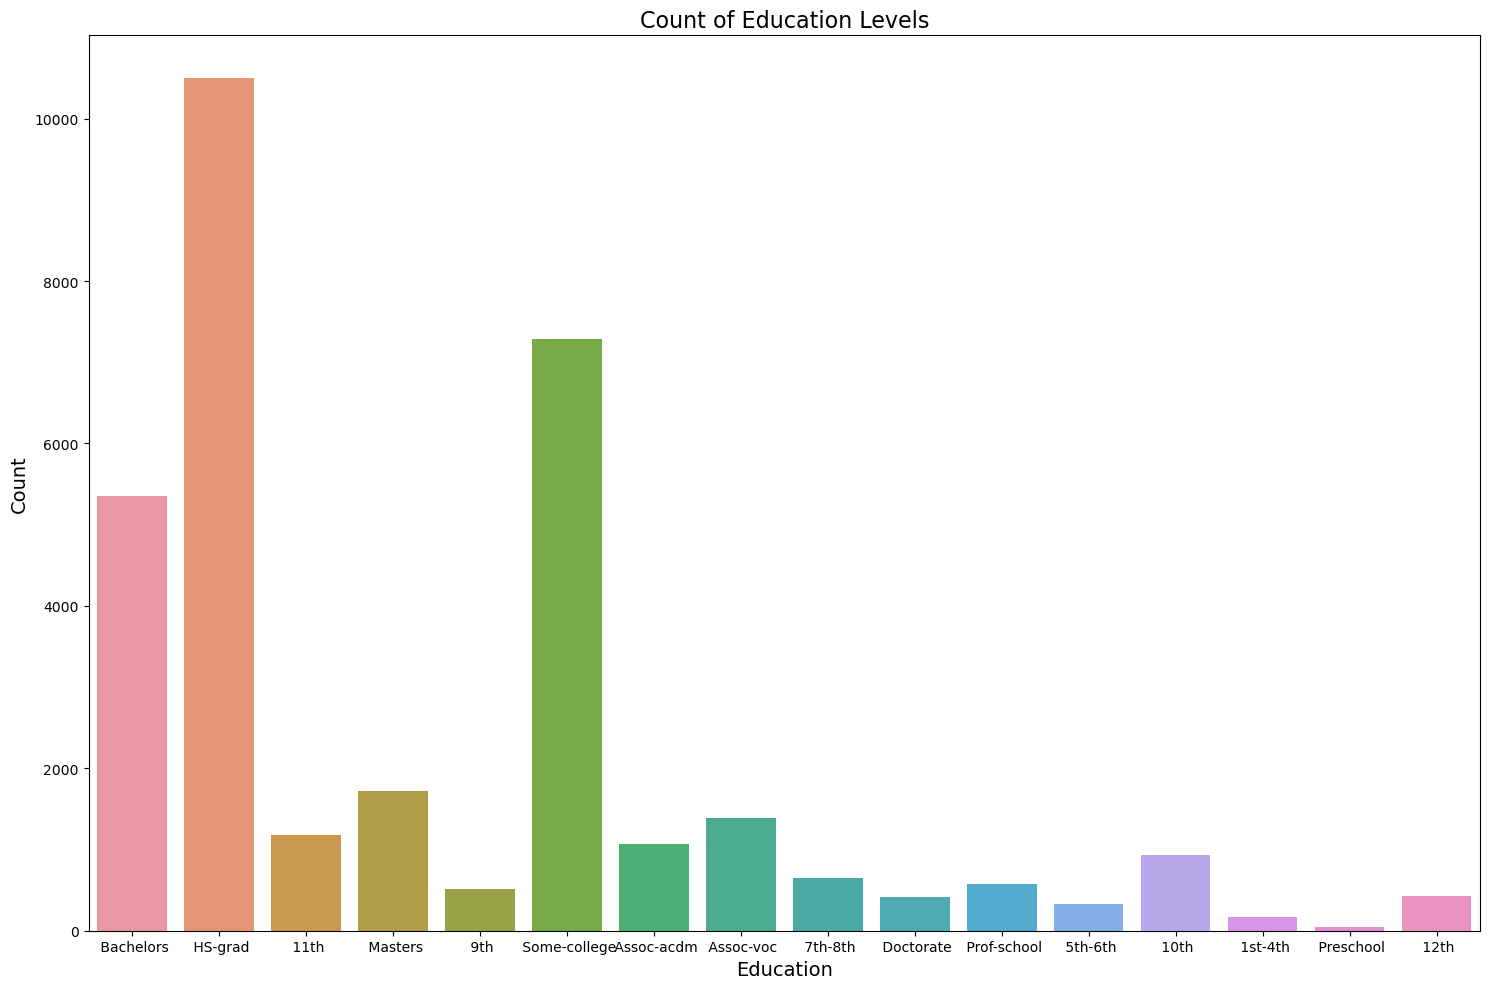

In [83]:
plt.figure(figsize = (15,10))
sns.countplot(x = df[' education'])

plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Education Levels', fontsize=16)
plt.tight_layout() 
plt.show()

### Plot a countplot of marital-status

In [84]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' income'],
      dtype='object')

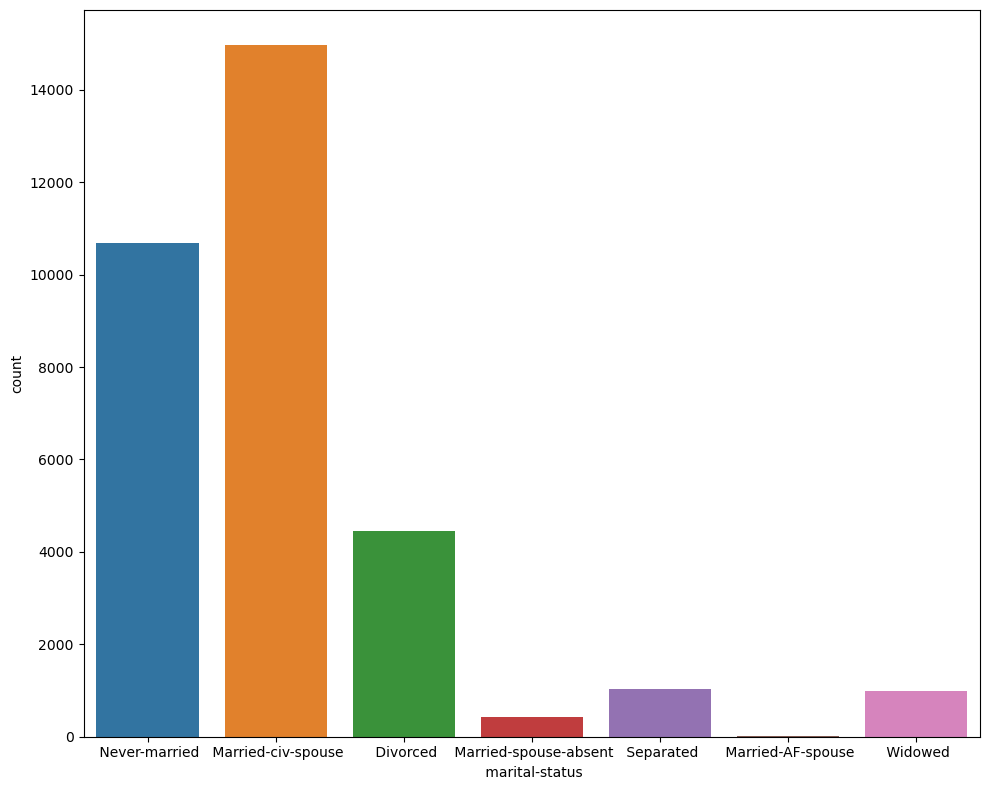

In [88]:
plt.figure(figsize = (10,8))
sns.countplot(x = df[' marital-status'])
plt.tight_layout()
plt.show()

### Plot a countplot of workclass with repect to race

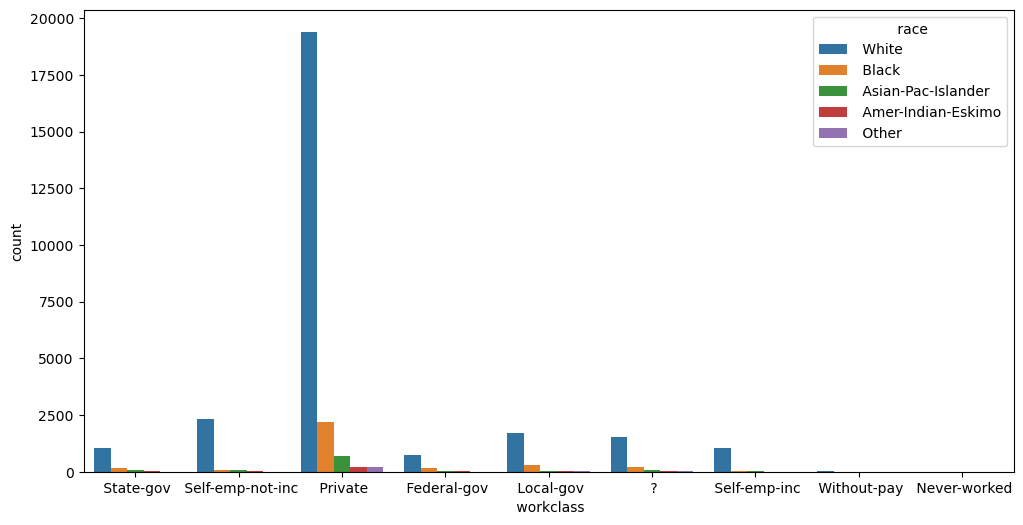

In [92]:
plt.figure(figsize=(12, 6))
sns.countplot(x = df[' workclass'], hue = df[' race'])

plt.show()

### Plot a countplot of education with respect to sex

In [93]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' income'],
      dtype='object')

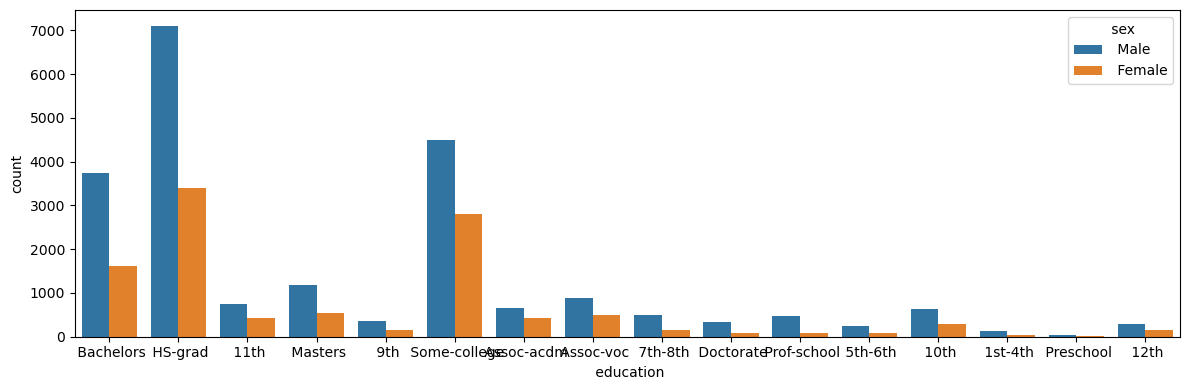

In [99]:
plt.figure(figsize = (12,4))
sns.countplot(data = df, x = ' education', hue = ' sex')
plt.tight_layout()
plt.show()

### Plot a countplot of occupation with respect to sex

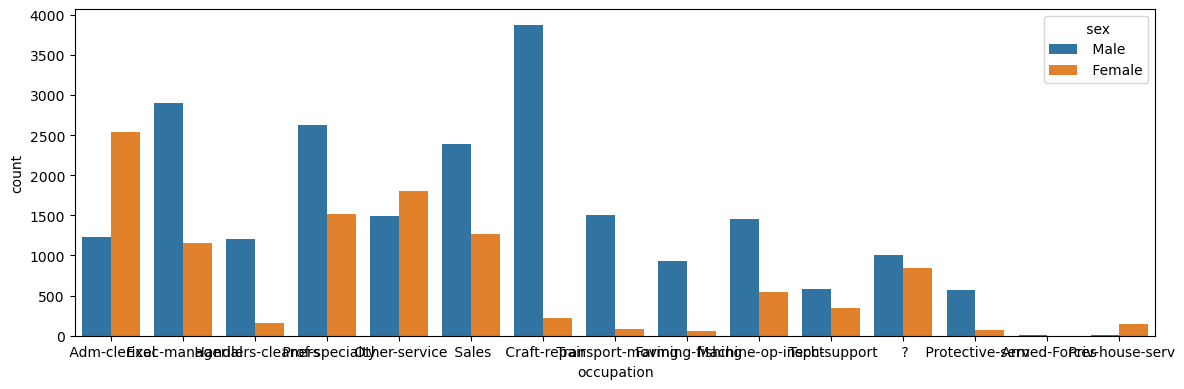

In [105]:
plt.figure(figsize = (12,4))
sns.countplot(data = df, x = ' occupation', hue = ' sex')
plt.xlabel('occupation', fontsize = 10)
#plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

### Plot a heatmap to view the correlation between features

C:\Users\mkala\AppData\Local\Temp\ipykernel_3392\1642330396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


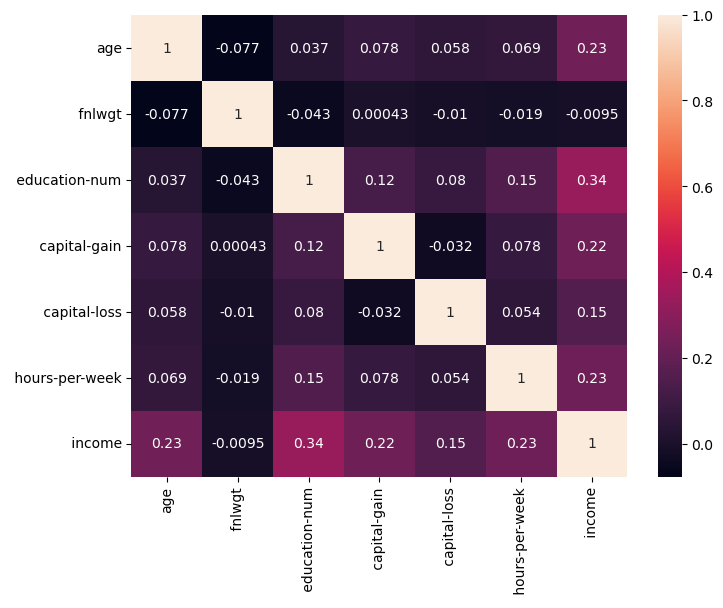

In [108]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Plot a pairplot of the dataset

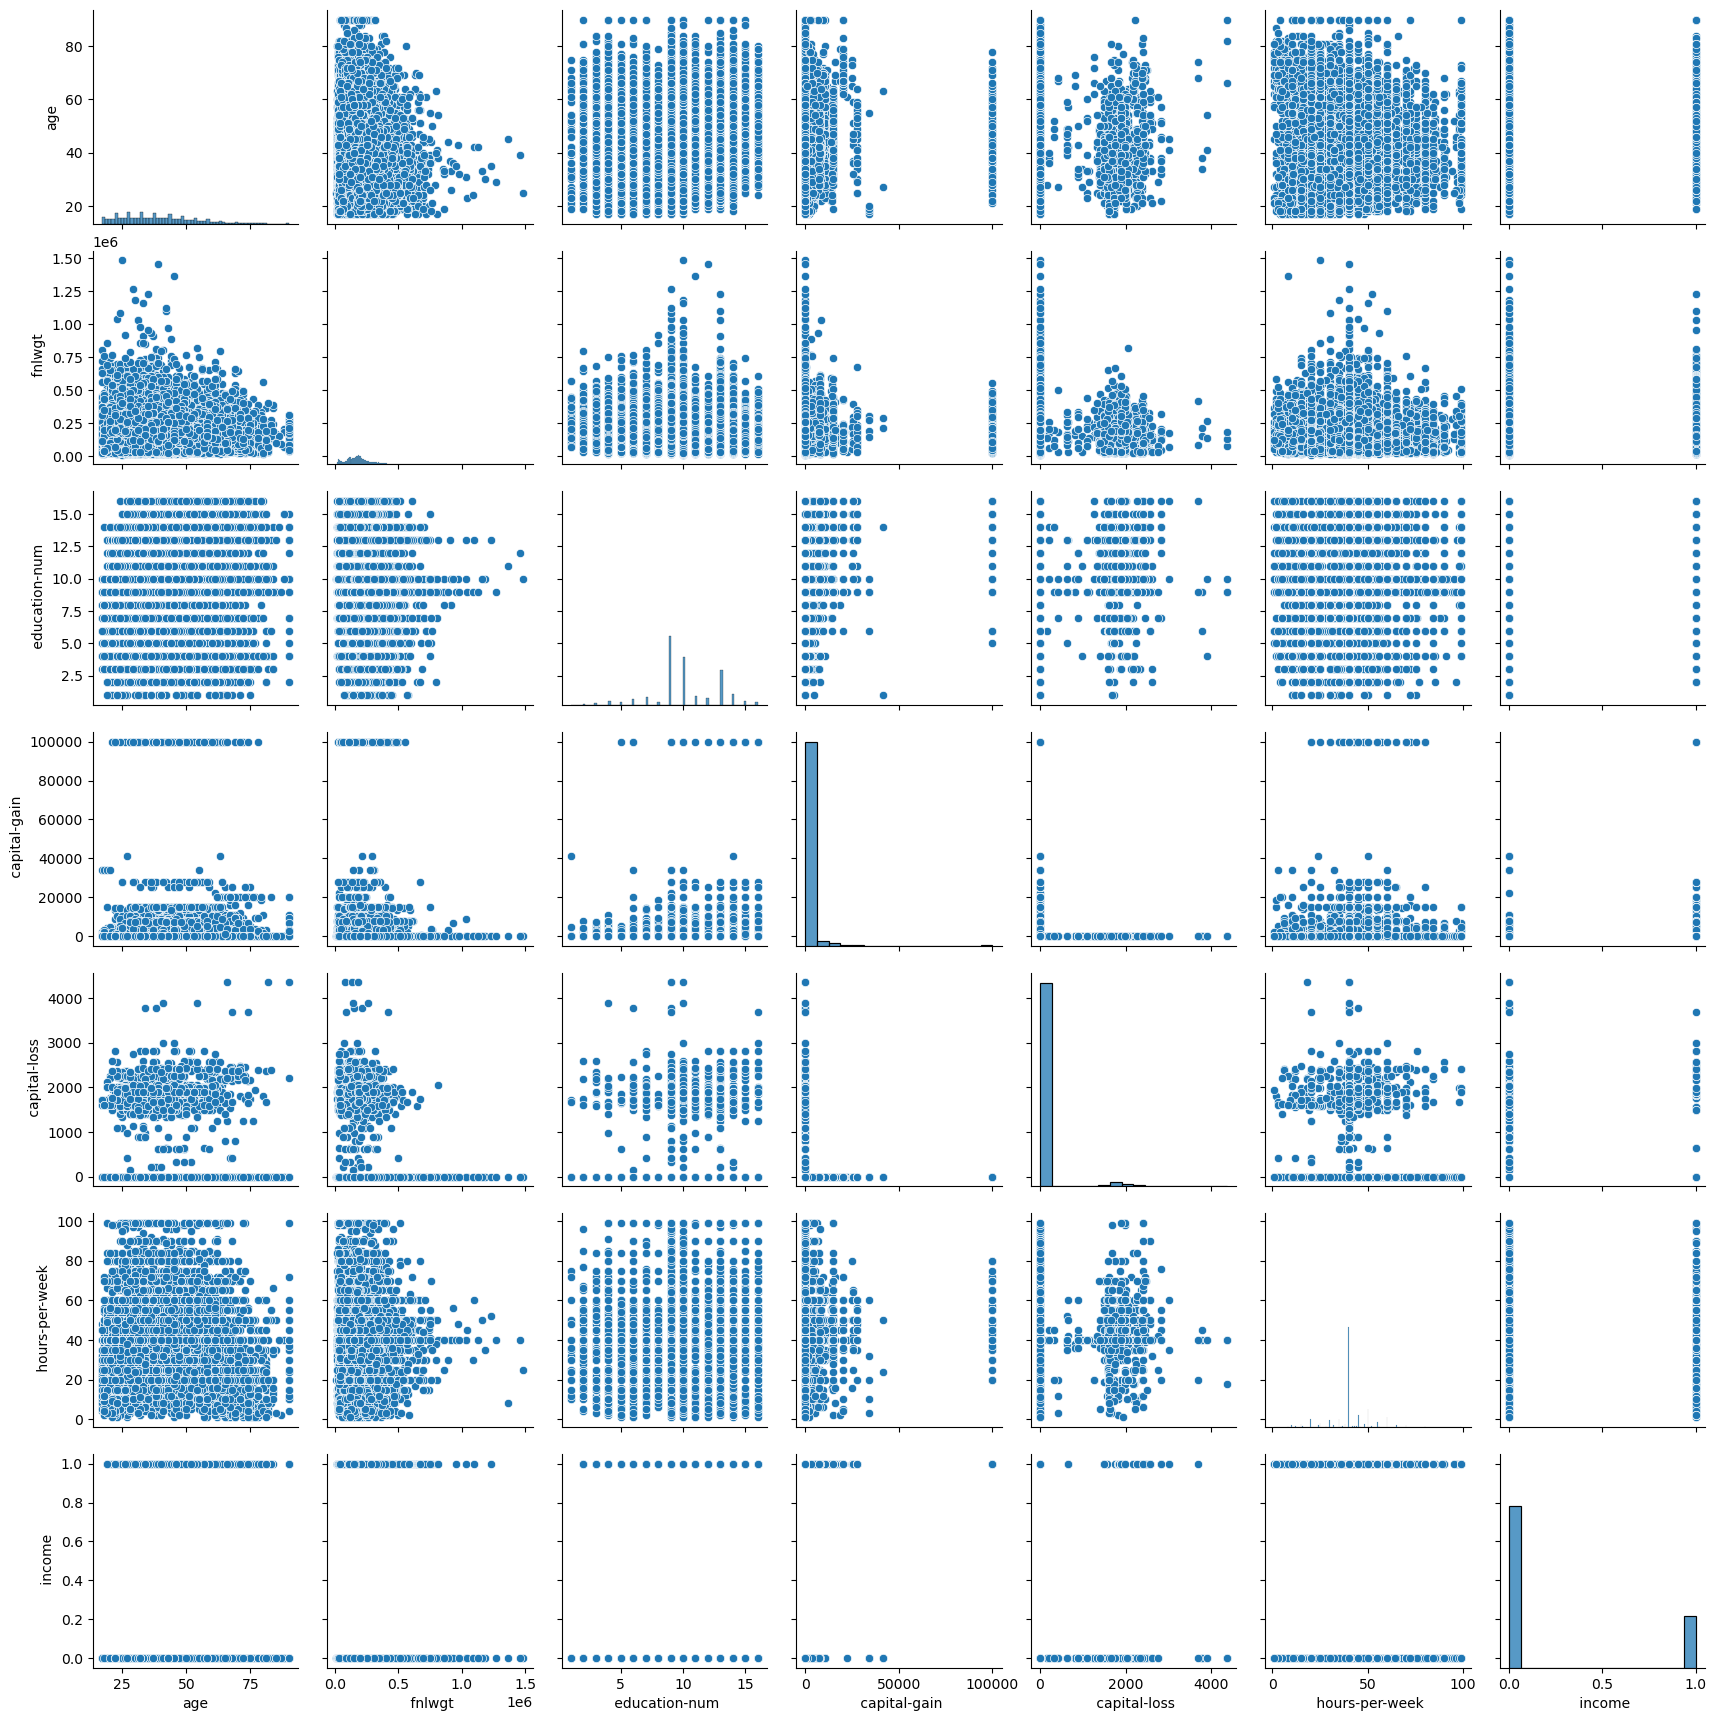

In [109]:
sns.pairplot(df)

### Change all the categorical columns into numeric using dummy variables (One Hot Encoding) & store it in a new Dataframe

In [110]:
pd.set_option('display.max_columns', None)

In [111]:
new_df = pd.get_dummies(df)

In [112]:
new_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


### Split the dataset into input and target variables

In [121]:
new_df.columns

Index(['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' income', ' workclass_ ?',
       ' workclass_ Federal-gov', ' workclass_ Local-gov',
       ' workclass_ Never-worked', ' workclass_ Private',
       ' workclass_ Self-emp-inc', ' workclass_ Self-emp-not-inc',
       ' workclass_ State-gov', ' workclass_ Without-pay', ' education_ 10th',
       ' education_ 11th', ' education_ 12th', ' education_ 1st-4th',
       ' education_ 5th-6th', ' education_ 7th-8th', ' education_ 9th',
       ' education_ Assoc-acdm', ' education_ Assoc-voc',
       ' education_ Bachelors', ' education_ Doctorate', ' education_ HS-grad',
       ' education_ Masters', ' education_ Preschool',
       ' education_ Prof-school', ' education_ Some-college',
       ' marital-status_ Divorced', ' marital-status_ Married-AF-spouse',
       ' marital-status_ Married-civ-spouse',
       ' marital-status_ Married-spouse-absent',
       ' marital-status_ Never-married',

In [122]:
X = new_df.drop(columns = [' income'])
y = new_df[' income']

In [123]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [124]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name:  income, Length: 32561, dtype: int64

### Carry out feature scaling with Standard Scaler

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()

In [127]:
xcolumns = X.columns

In [128]:
X = scaler.fit_transform(X)

In [129]:
X = pd.DataFrame(X, columns = xcolumns)

In [130]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,-0.290936,4.907700,-0.02074,-0.171753,-0.193487,-0.116092,-0.072016,-0.10165,-0.142272,-0.126645,-0.184064,-0.210534,2.253993,-0.113344,-0.689942,-0.236374,-0.039607,-0.134196,-0.537144,-0.397508,-0.026587,-0.922841,-0.114037,1.431058,-0.180285,-0.177358,-0.244944,2.763489,-0.016628,-0.379495,-0.377746,-0.17745,-0.209578,-0.255954,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,1.708991,-0.17625,-0.429346,-0.344032,-0.224927,-0.098201,-0.181552,-0.325768,-0.091612,0.413020,-0.703071,0.703071
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-0.24445,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,3.437186,-0.203761,-0.02074,-0.171753,-0.193487,-0.116092,-0.072016,-0.10165,-0.142272,-0.126645,-0.184064,-0.210534,2.253993,-0.113344,-0.689942,-0.236374,-0.039607,-0.134196,-0.537144,-0.397508,-0.026587,1.083611,-0.114037,-0.698784,-0.180285,-0.177358,-0.244944,-0.361861,-0.016628,-0.379495,2.647285,-0.17745,-0.209578,-0.255954,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927,-0.098201,-0.181552,-0.325768,-0.091612,0.413020,-0.703071,0.703071
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.171753,-0.193487,-0.116092,-0.072016,-0.10165,-0.142272,-0.126645,-0.184064,-0.210534,-0.443657,-0.113344,1.449397,-0.236374,-0.039607,-0.134196,-0.537144,2.515672,-0.026587,-0.922841,-0.114037,-0.698784,-0.180285,-0.177358,-0.244944,-0.361861,-0.016628,-0.379495,-0.377746,-0.17745,4.771494,-0.255954,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,1.708991,-0.17625,-0.429346,-0.344032,-0.224927,-0.098201,-0.181552,-0.325768,-0.091612,0.413020,-0.703071,0.703071
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.171753,5.168316,-0.116092,-0.072016,-0.10165,-0.142272,-0.126645,-0.184064,-0.210534,-0.443657,-0.113344,-0.689942,-0.236374,-0.039607,-0.134196,-0.537144,-0.397508,-0.026587,1.083611,-0.114037,-0.698784,-0.180285,-0.177358,-0.244944,-0.361861,-0.016628,-0.379495,-0.377746,-0.17745,4.771494,-0.255954,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927,-0.098201,-0.181552,3.069667,-0.091612,-2.421192,-0.70

### Split the dataset into training & Testing set

In [131]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 100)

### Check the shape of X_train and X_test

In [137]:
X_train.shape

(22792, 66)

In [138]:
X_test.shape

(9769, 66)

### Create Gaussian Naive Bayes model

In [139]:
from sklearn.naive_bayes import GaussianNB

In [140]:
model = GaussianNB()

### Train the model

In [141]:
model.fit(X_train, y_train)

GaussianNB()

### Check the score of our model

In [142]:
model.score(X_train, y_train)

0.5533520533520534

### Make predictions with X_test

In [143]:
y_pred = model.predict(X_test)

### Check the accuracy score of our prediction

In [144]:
from sklearn import metrics

In [145]:
metrics.accuracy_score(y_test, y_pred)

0.5438632408639574

### Create confusion matrix

In [146]:
metrics.confusion_matrix(y_test, y_pred)

array([[3069, 4359],
       [  97, 2244]], dtype=int64)

### Visualize confusion matrix

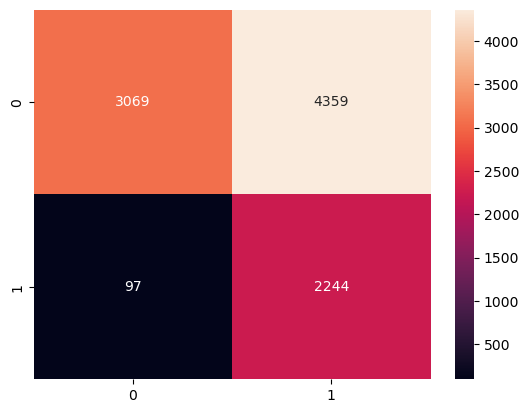

In [148]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt='d')
plt.show()

### Create classification report

In [149]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.41      0.58      7428
           1       0.34      0.96      0.50      2341

    accuracy                           0.54      9769
   macro avg       0.65      0.69      0.54      9769
weighted avg       0.82      0.54      0.56      9769



***